<a href="https://colab.research.google.com/github/rosadasilva6/MIS545_LearningMachines_Final/blob/main/545Strokefinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# prompt: mount my drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/MIS 545/Labs/healthcare-dataset-stroke-data.csv')
# Display data description
print(data.describe())

# Show the first few rows of the data
print(data.head())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [9]:

# Drop irrelevant columns
data.drop('id', axis=1, inplace=True)

# Handle missing values in 'bmi' by imputing the mean
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

# Encode categorical variables
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Separate features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Normalize numeric features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



Feature Importances (Random Forest):
             Feature  Importance
7  avg_glucose_level    0.284865
8                bmi    0.234405
1                age    0.232510
9     smoking_status    0.067607
5          work_type    0.049520
0             gender    0.034088
6     Residence_type    0.031169
2       hypertension    0.024514
3      heart_disease    0.022205
4       ever_married    0.019116


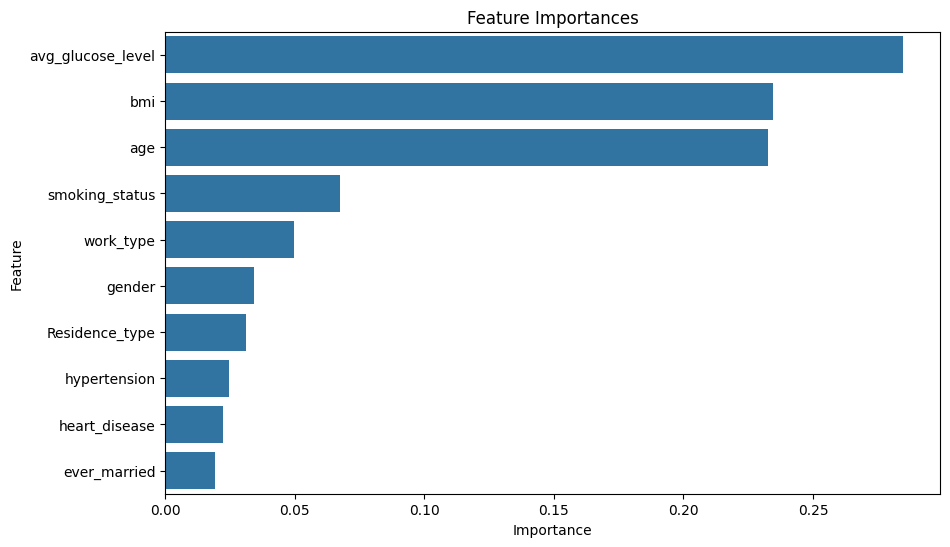

In [10]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42) # Initialize the model
rf_model.fit(X_train, y_train) # Train the model on the training data

importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances (Random Forest):")
print(feature_importances_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [11]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Resampled class distribution:
stroke
0    3901
1    3901
Name: count, dtype: int64


In [12]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Metrics
Accuracy: 0.860078277886497
Precision: 0.09090909090909091
Recall: 0.14516129032258066
AUC-ROC: 0.5257056451612904
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       960
           1       0.09      0.15      0.11        62

    accuracy                           0.86      1022
   macro avg       0.52      0.53      0.52      1022
weighted avg       0.89      0.86      0.87      1022



In [13]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest Metrics
Accuracy: 0.9168297455968689
Precision: 0.1891891891891892
Recall: 0.11290322580645161
AUC-ROC: 0.5408266129032258
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.19      0.11      0.14        62

    accuracy                           0.92      1022
   macro avg       0.57      0.54      0.55      1022
weighted avg       0.90      0.92      0.91      1022



In [14]:
# Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_resampled, y_resampled)
y_pred_nn = nn_model.predict(X_test)

print("\nNeural Network Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Precision:", precision_score(y_test, y_pred_nn))
print("Recall:", recall_score(y_test, y_pred_nn))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))



Neural Network Metrics
Accuracy: 0.8522504892367906
Precision: 0.17985611510791366
Recall: 0.4032258064516129
AUC-ROC: 0.6422379032258064
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       960
           1       0.18      0.40      0.25        62

    accuracy                           0.85      1022
   macro avg       0.57      0.64      0.58      1022
weighted avg       0.91      0.85      0.88      1022



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
dt_params = {'max_depth': [5, 10, 20, None],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

# Perform Grid Search
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='recall')
dt_grid.fit(X_resampled, y_resampled)
print("Best Decision Tree Params:", dt_grid.best_params_)

Best Decision Tree Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [16]:
rf_params = {'n_estimators': [100, 200, 500],
             'max_depth': [10, 20, None],
             'min_samples_split': [2, 5, 10]}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='recall')
rf_grid.fit(X_resampled, y_resampled)
print("Best Random Forest Params:", rf_grid.best_params_)


Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [17]:
# prompt: use this code # Decision Tree Model
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_resampled, y_resampled)
# y_pred_dt = dt_model.predict(X_test)
# print("\nDecision Tree Metrics")
# print("Accuracy:", accuracy_score(y_test, y_pred_dt))
# print("Precision:", precision_score(y_test, y_pred_dt))
# print("Recall:", recall_score(y_test, y_pred_dt))
# print("AUC-ROC:", roc_auc_score(y_test, y_pred_dt))
# print(classification_report(y_test, y_pred_dt)) apply these hyperparameters Best Decision Tree Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier  # This line is added to import the missing class

# Decision Tree Model with hyperparameters
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model.fit(X_resampled, y_resampled)
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree Metrics with Hyperparameters")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Metrics with Hyperparameters
Accuracy: 0.8649706457925636
Precision: 0.11224489795918367
Recall: 0.1774193548387097
AUC-ROC: 0.5433971774193549
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       960
           1       0.11      0.18      0.14        62

    accuracy                           0.86      1022
   macro avg       0.53      0.54      0.53      1022
weighted avg       0.89      0.86      0.88      1022



In [ ]:
# prompt: use these parameters Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200} apply to this# Random Forest Model
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_resampled, y_resampled)
# y_pred_rf = rf_model.predict(X_test)
# print("\nRandom Forest Metrics")
# print("Accuracy:", accuracy_score(y_test, y_pred_rf))
# print("Precision:", precision_score(y_test, y_pred_rf))
# print("Recall:", recall_score(y_test, y_pred_rf))
# print("AUC-ROC:", roc_auc_score(y_test, y_pred_rf))
# print(classification_report(y_test, y_pred_rf))

# Random Forest Model with best hyperparameters
rf_model = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=200, random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Metrics with Best Hyperparameters")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Metrics with Best Hyperparameters
Accuracy: 0.9178082191780822
Precision: 0.225
Recall: 0.14516129032258066
AUC-ROC: 0.556434811827957
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.23      0.15      0.18        62

    accuracy                           0.92      1022
   macro avg       0.59      0.56      0.57      1022
weighted avg       0.90      0.92      0.91      1022



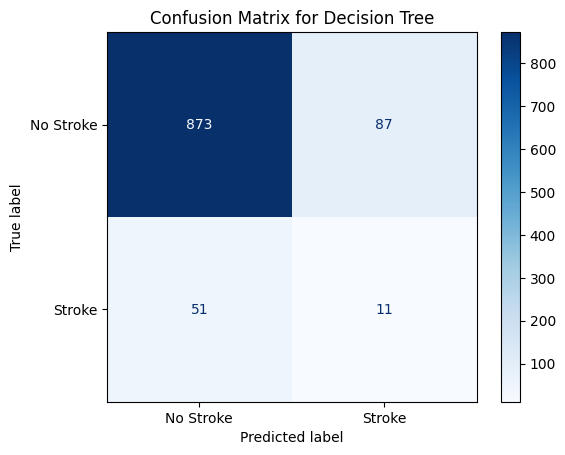

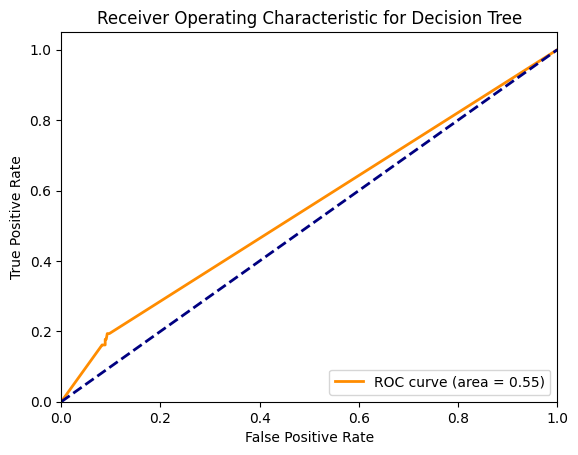

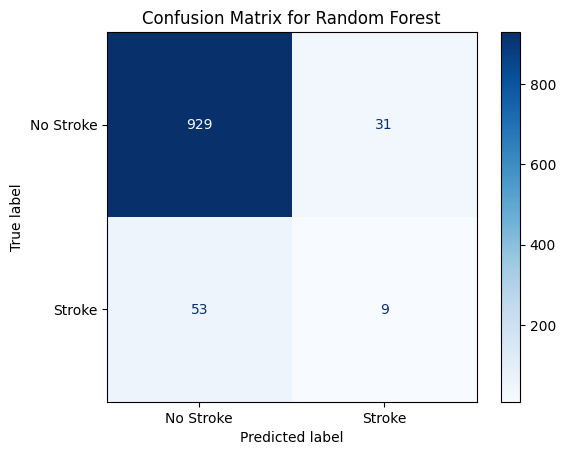

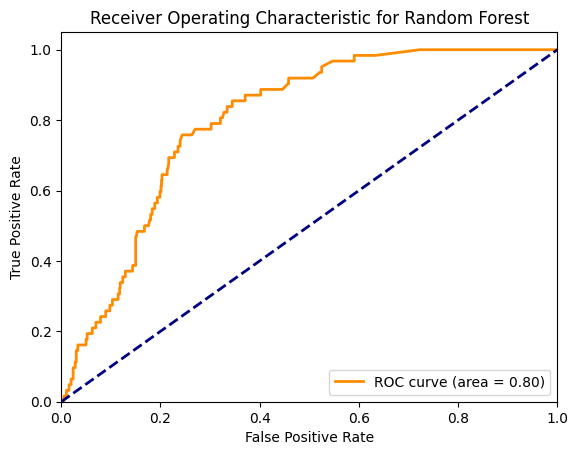

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Neural Network Metrics
Accuracy: 0.8522504892367906
Precision: 0.17985611510791366
Recall: 0.4032258064516129
AUC-ROC: 0.7672211021505377
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       960
           1       0.18      0.40      0.25        62

    accuracy                           0.85      1022
   macro avg       0.57      0.64      0.58      1022
weighted avg       0.91      0.85      0.88      1022



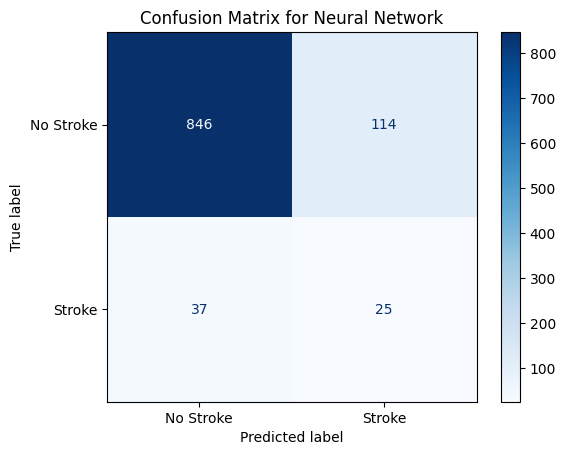

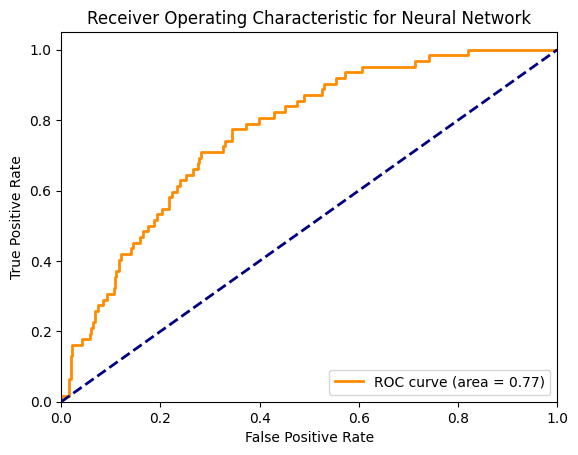

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

def plot_roc_auc(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Decision Tree Metrics and Plots
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_roc_auc(y_test, dt_model.predict_proba(X_test), "Decision Tree")

# Random Forest Metrics and Plots
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_roc_auc(y_test, rf_model.predict_proba(X_test), "Random Forest")

# Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_resampled, y_resampled)
y_pred_nn = nn_model.predict(X_test)

print("\nNeural Network Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Precision:", precision_score(y_test, y_pred_nn))
print("Recall:", recall_score(y_test, y_pred_nn))
print("AUC-ROC:", roc_auc_score(y_test, nn_model.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_nn))

# Neural Network Metrics and Plots
plot_confusion_matrix(y_test, y_pred_nn, "Neural Network")
plot_roc_auc(y_test, nn_model.predict_proba(X_test), "Neural Network")

In [16]:
# prompt: change tbis so the scpring is recall rf_params = {'n_estimators': [100, 200, 500],
#              'max_depth': [10, 20, None],
#              'min_samples_split': [2, 5, 10]}
# rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='recall')
# rf_grid.fit(X_resampled, y_resampled)
# print("Best Random Forest Params:", rf_grid.best_params_)

rf_params = {'n_estimators': [100, 200, 500],
             'max_depth': [10, 20, None],
             'min_samples_split': [2, 5, 10]}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='recall')
rf_grid.fit(X_resampled, y_resampled)
print("Best Random Forest Params:", rf_grid.best_params_)

KeyboardInterrupt: 

In [18]:
nn_params = {'hidden_layer_sizes': [(50,), (100,), (100, 50)],
             'activation': ['relu', 'tanh'],
             'solver': ['adam', 'sgd'],
             'learning_rate_init': [0.001, 0.01, 0.1]}

nn_grid = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), nn_params, cv=3, scoring='recall')
nn_grid.fit(X_resampled, y_resampled)
print("Best Neural Network Params:", nn_grid.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Neural Network Params: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.1, 'solver': 'adam'}
